---
### Alumno: Leandro Borgnino
### Curso: Aprendizaje de Máquina
### Profesores: Claudio Delrieux - Manlio Miguel Massiris
---


# TP3 - Parte I - Clasificador KNN



---



### Ejercicio 3.1: 
Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia).  
Tip: reutilizar el código de la NB que vimos para outliers.  
Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y también cambiando centroide y covariancia de las clases.


### 3.1.1 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

### 3.1.2 Funciones TP 2

In [ ]:
N = 100

mu_A = 0
sigma_A = 2

mu_B = 5
sigma_B = 5

In [ ]:
A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(N, 2)),columns=['x','y'])
A_df['etiqueta'] = 'A'

B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(N, 2)),columns=['x','y'])
B_df['etiqueta'] = 'B'


In [ ]:
print("Dataset A")
display(A_df[0:5])
print()
print("Dataset B")
display(B_df[0:5])

Dataset A


,x,y,etiqueta
0,-1.160685,3.892964,A
1,1.443871,-2.502229,A
2,-1.680260,-0.076292,A
3,-1.044941,0.454782,A
4,-1.912369,2.291694,A



Dataset B


,x,y,etiqueta
0,4.857678,4.401483,B
1,-5.522005,13.102357,B
2,10.139861,9.759787,B
3,8.087044,8.670622,B
4,10.311459,-6.120230,B


In [ ]:
dataset_combinados = A_df.append(B_df)

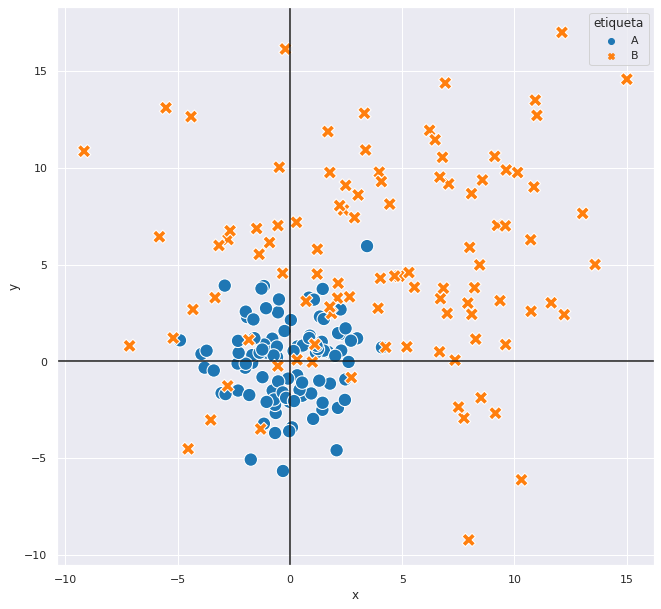

In [ ]:
sns.set(rc={'figure.figsize':(10.7,10.27)})
sns.scatterplot(x='x',y='y',hue='etiqueta',palette="tab10",data=dataset_combinados,s=180, style='etiqueta' )
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')

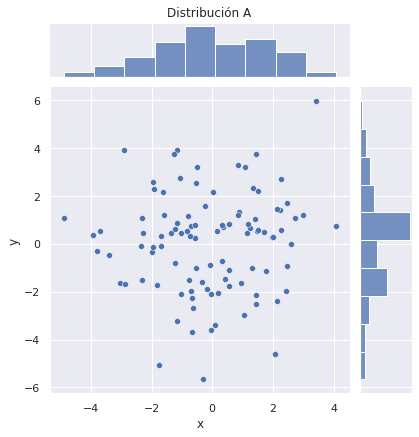

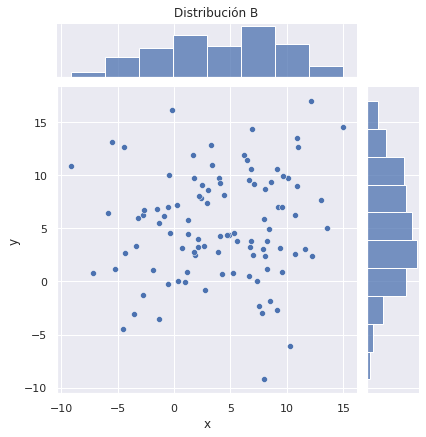

In [ ]:
ax = sns.jointplot(x=A_df["x"], y=A_df["y"])
ax.fig.suptitle('Distribución A', fontsize=12, verticalalignment='bottom');
ax = sns.jointplot(x=B_df["x"], y=B_df["y"])
ax.fig.suptitle('Distribución B', fontsize=12, verticalalignment='bottom');

### 3.1.3 Clasificador KNN

In [ ]:
from sklearn.model_selection import train_test_split
train_rel = 0.5
train, test = train_test_split(dataset_combinados, train_size = train_rel)

print("Set de entrenamiento:\t", len(train))
print("Set de test:\t\t", len(test))

Set de entrenamiento:	 100
Set de test:		 100


In [ ]:
X = train[['x','y']].values
X_test = test[['x','y']].values

In [ ]:
K = 10
KNN = neighbors.KNeighborsClassifier(n_neighbors=K)
KNN.fit(X, train['etiqueta'])
print(f"Modelo entrenado - Accuracy: {KNN.score(X_test, test['etiqueta'])}")

Modelo entrenado - Accuracy: 0.91


Etiqueta A: 0.000000% 
Etiqueta B: 1.000000% 


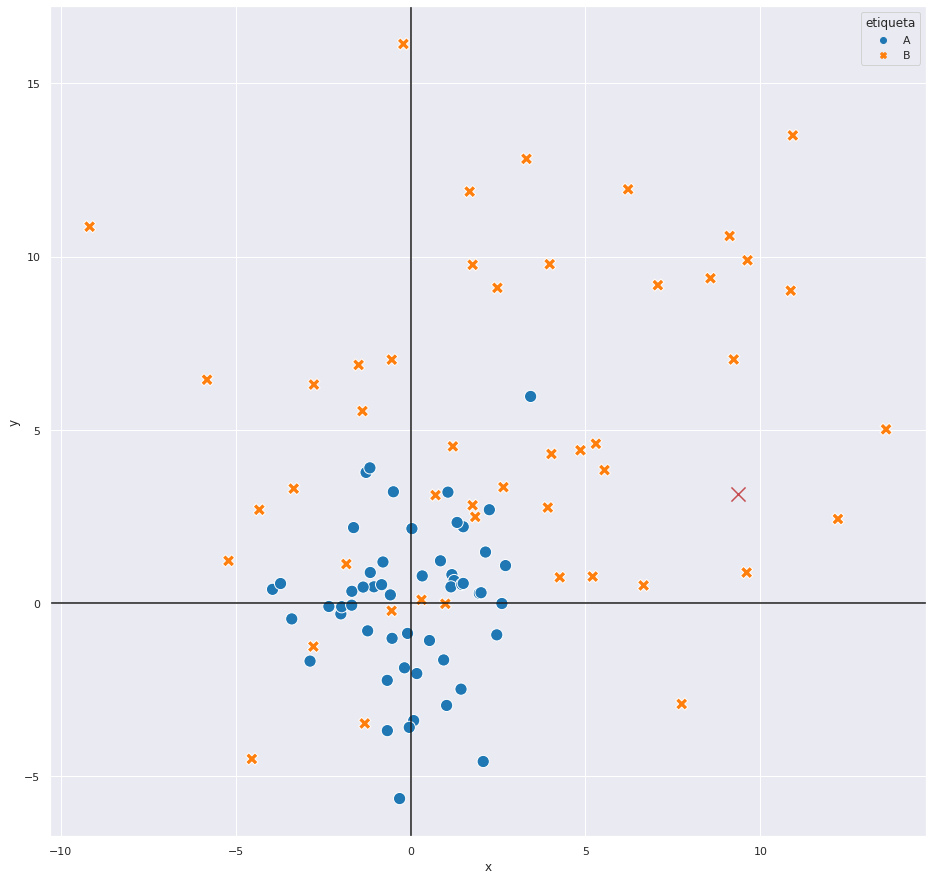

In [ ]:
predict = test[['x','y']].values[0]
prediction = KNN.predict_proba([predict])
print("Etiqueta A: %f%% \nEtiqueta B: %f%% "%(prediction[0][0],prediction[0][1]))

sns.set(rc={'figure.figsize':(15.7,15.27)})
sns.scatterplot(x='x',y='y',hue='etiqueta',palette="tab10",data=train,s=150, style='etiqueta' );
plt.scatter(x=predict[0], y=predict[1],color='r',marker='x',s=200, linewidths=100);
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')

Metricas:
              precision    recall  f1-score   support

           A       0.85      0.98      0.91        47
           B       0.98      0.85      0.91        53

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



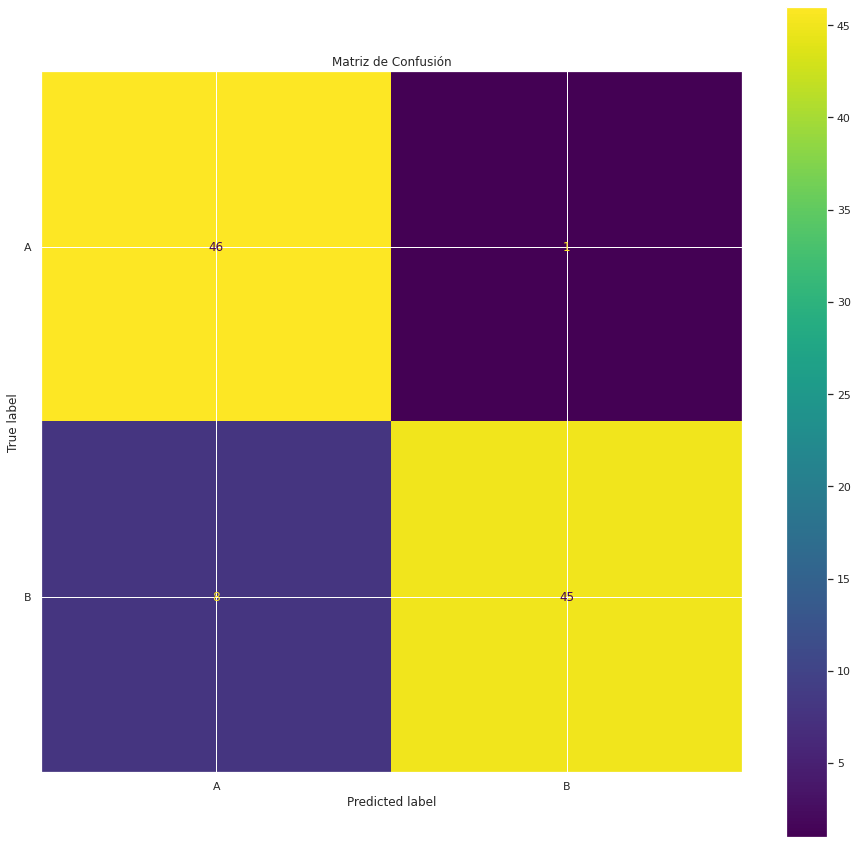

In [ ]:
y_predicted = KNN.predict(X_test)
print("Metricas:")
print(f"{metrics.classification_report(test['etiqueta'], y_predicted)}")
confusion_matrix = metrics.plot_confusion_matrix(KNN, X_test, test['etiqueta'])
plt.title("Matriz de Confusión")
plt.show()

## Evaluación respecto a K

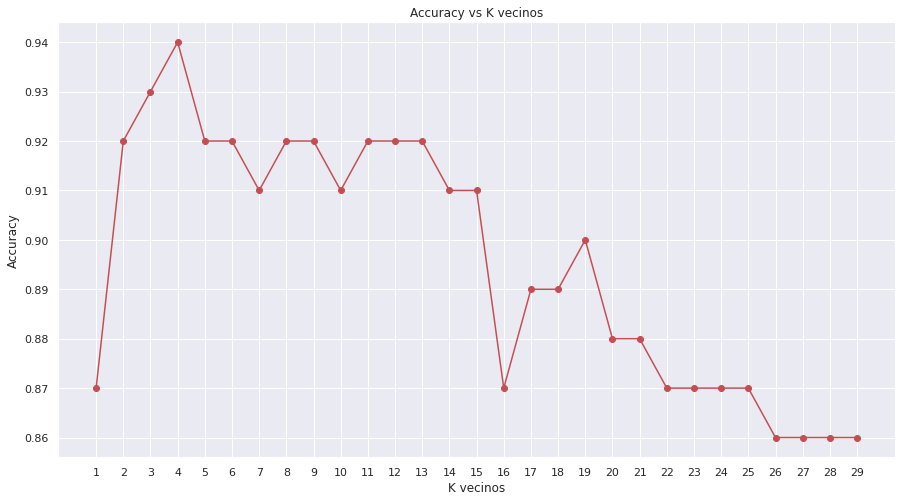

In [ ]:
scores = []
x_range = []
for k in range(1,30):
  KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X, train['etiqueta'])
  scores.append(KNN.score(X_test, test['etiqueta']))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores,'ro-')
plt.xticks(x_range)
plt.title("Accuracy vs K vecinos")
plt.xlabel("K vecinos")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
K = 3
KNN = neighbors.KNeighborsClassifier(n_neighbors=K)
KNN.fit(X, train['etiqueta'])
print(f"Modelo entrenado - Accuracy: {KNN.score(X_test, test['etiqueta'])}")

Modelo entrenado - Accuracy: 0.93


Metricas:
              precision    recall  f1-score   support

           A       0.92      0.94      0.93        47
           B       0.94      0.92      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



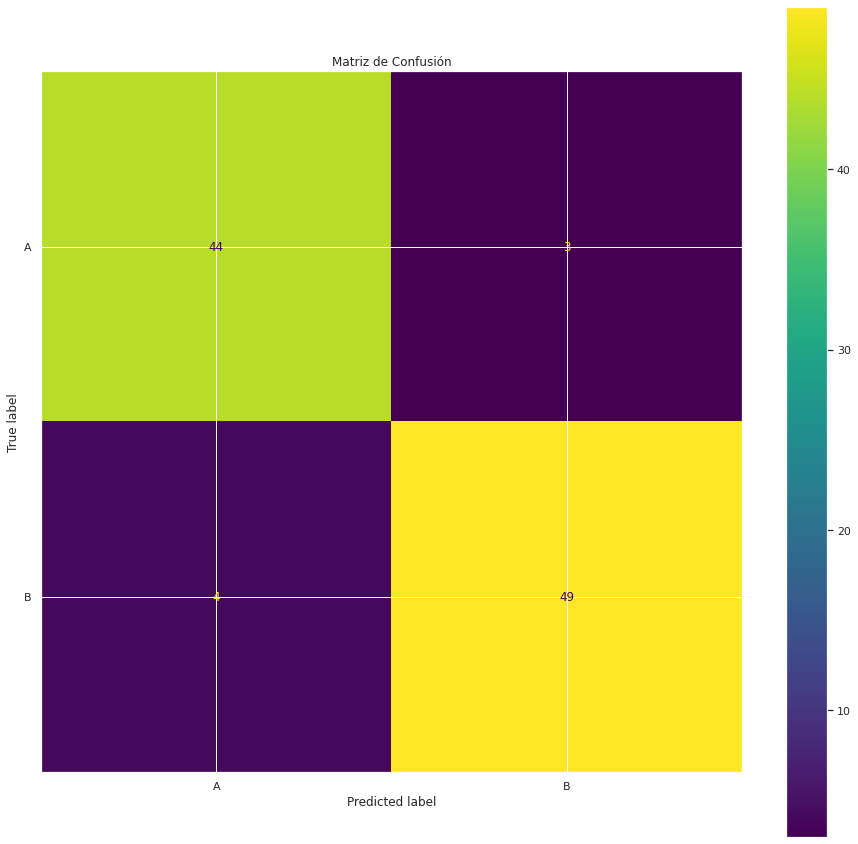

In [ ]:
y_predicted = KNN.predict(X_test)
print("Metricas:")
print(f"{metrics.classification_report(test['etiqueta'], y_predicted)}")
confusion_matrix = metrics.plot_confusion_matrix(KNN, X_test, test['etiqueta'])
plt.title("Matriz de Confusión")
plt.show()

### Conclusión

Como podemos observar, el número de K vecinos más cercanos óptimo para este dataset es 7 u 8. La accuracy para estos valores de K es por encima del 90% de aciertos. Respecto a la relación entre accuracy y el número de K vecinos, puede intterpretarse que al tener pocos vecinos, fácilmente puede equivocar la clasificación ya que solo depende de pocos puntos que pueden no representar al conjunto, por lo que la accuracy es baja. Cuando se evalúan muchos vecinos cercanos comparado al tamaño del dataset, la accuracy baja nuevamente, ya que estamos evaluando muchos elementos que corresponderán a las dos etiquetas.

## Evaluación respecto a N

In [ ]:
mu_A = 0
sigma_A = 2

mu_B = 5
sigma_B = 5

In [ ]:
N_s = [30,50,100,200,300]
array_n_dist = []
for i in N_s:
  A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(i, 2)),columns=['x','y'])
  A_df['etiqueta'] = 'A'

  B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(i, 2)),columns=['x','y'])
  B_df['etiqueta'] = 'B'

  dataset_combinados = A_df.append(B_df)

  train_rel = 0.5
  train, test = train_test_split(dataset_combinados, train_size = train_rel)

  print("Set de entrenamiento:\t", len(train))
  print("Set de test:\t\t", len(test))

  X = train[['x','y']].values
  X_test = test[['x','y']].values

  scores = []
  x_range = []
  for k in range(1,30):
    KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X, train['etiqueta'])
    scores.append(KNN.score(X_test, test['etiqueta']))
    x_range.append(k)
  array_n_dist.append(scores)

Set de entrenamiento:	 30
Set de test:		 30
Set de entrenamiento:	 50
Set de test:		 50
Set de entrenamiento:	 100
Set de test:		 100
Set de entrenamiento:	 200
Set de test:		 200
Set de entrenamiento:	 300
Set de test:		 300


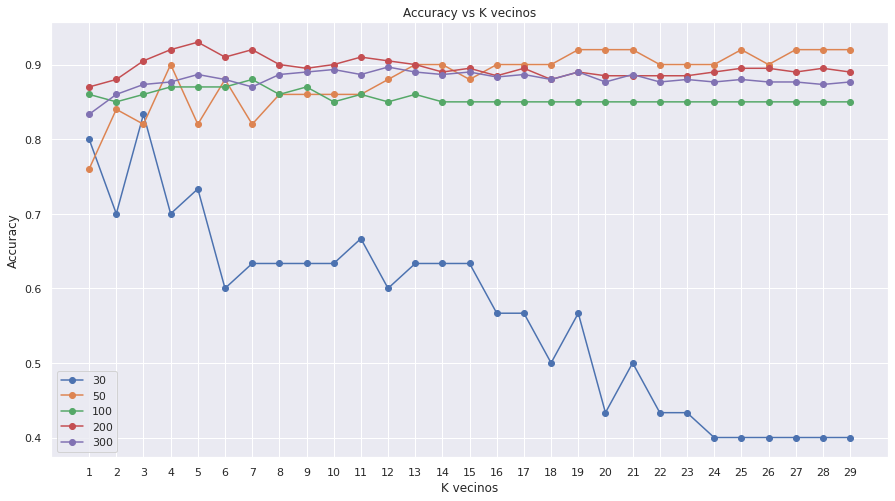

In [ ]:
plt.figure(figsize=(15,8))

for i in range(len(array_n_dist)):
  plt.plot(x_range,array_n_dist[i],'o-', label=N_s[i])

plt.xticks(x_range)
plt.title("Accuracy vs K vecinos")
plt.xlabel("K vecinos")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Conclusión
Por regla general, cuantos más datos se tengan del dataset, mayor accuracy tendremos para todos los valores de K que probemos. Se ve claramente que cuando se tienen pocos elementos en el set de datos, al ir incrementando K y llegando al límite de tomar todos los elementos restantes para la clasificación, la accuracy baja considerablemente.

### Cambio de la distribución (medias y varianzas)

In [ ]:
N = 100

mu_A = 0
sigma_A = 2

mu_B = 10
sigma_B = 3

In [ ]:
A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(N, 2)),columns=['x','y'])
A_df['etiqueta'] = 'A'

B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(N, 2)),columns=['x','y'])
B_df['etiqueta'] = 'B'


In [ ]:
print("Dataset A")
display(A_df[0:5])
print()
print("Dataset B")
display(B_df[0:5])

Dataset A


,x,y,etiqueta
0,-1.392084,-0.043740,A
1,-1.889710,-0.528846,A
2,-2.144882,-3.658774,A
3,-0.388686,0.557784,A
4,2.686844,-0.351004,A



Dataset B


,x,y,etiqueta
0,8.336687,9.794861,B
1,8.683675,8.457479,B
2,5.529888,12.045327,B
3,7.551109,12.950145,B
4,14.855244,6.967843,B


In [ ]:
dataset_combinados = A_df.append(B_df)

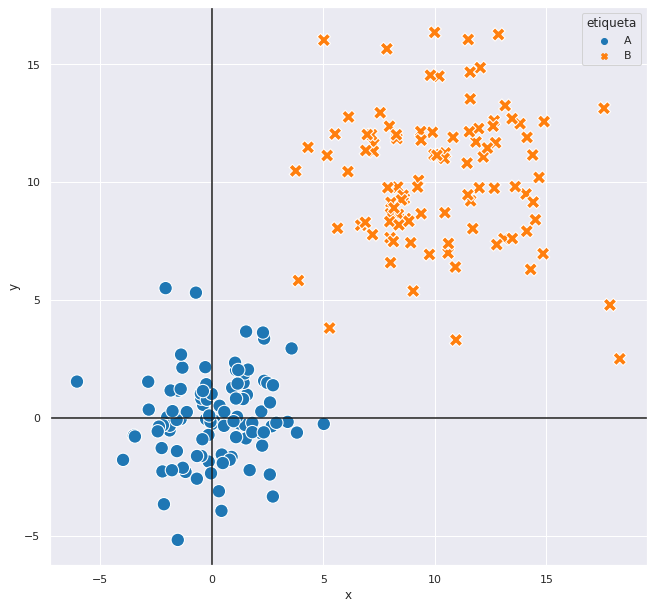

In [ ]:
sns.set(rc={'figure.figsize':(10.7,10.27)})
sns.scatterplot(x='x',y='y',hue='etiqueta',palette="tab10",data=dataset_combinados,s=180, style='etiqueta' )
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')

In [ ]:
from sklearn.model_selection import train_test_split
train_rel = 0.5
train, test = train_test_split(dataset_combinados, train_size = train_rel)

print("Set de entrenamiento:\t", len(train))
print("Set de test:\t\t", len(test))

Set de entrenamiento:	 100
Set de test:		 100


In [ ]:
X = train[['x','y']].values
X_test = test[['x','y']].values

In [ ]:
K = 10
KNN = neighbors.KNeighborsClassifier(n_neighbors=K)
KNN.fit(X, train['etiqueta'])
print(f"Modelo entrenado - Accuracy: {KNN.score(X_test, test['etiqueta'])}")

Modelo entrenado - Accuracy: 0.99


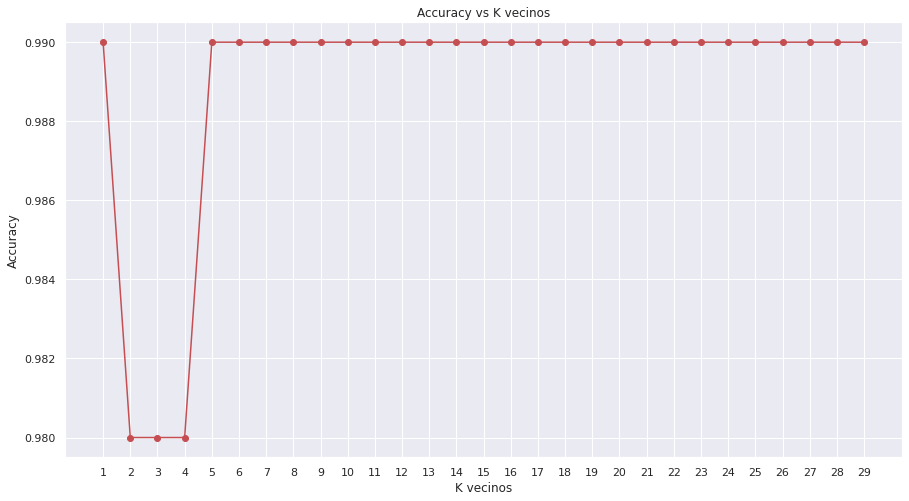

In [ ]:
scores = []
x_range = []
for k in range(1,30):
  KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X, train['etiqueta'])
  scores.append(KNN.score(X_test, test['etiqueta']))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores,'ro-')
plt.xticks(x_range)
plt.title("Accuracy vs K vecinos")
plt.xlabel("K vecinos")
plt.ylabel("Accuracy")
plt.show()

Metricas:
              precision    recall  f1-score   support

           A       0.98      1.00      0.99        56
           B       1.00      0.98      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



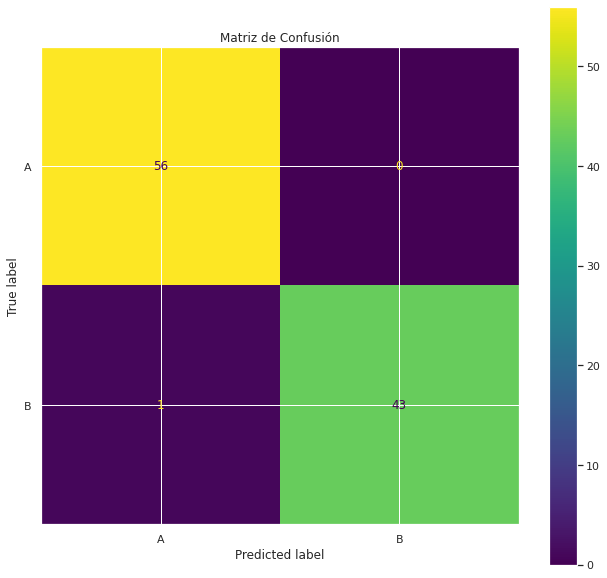

In [ ]:
y_predicted = KNN.predict(X_test)
print("Metricas:")
print(f"{metrics.classification_report(test['etiqueta'], y_predicted)}")
confusion_matrix = metrics.plot_confusion_matrix(KNN, X_test, test['etiqueta'])
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
N = 100

mu_A = 0
sigma_A = 4

mu_B = 2
sigma_B = 4

In [ ]:
A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(N, 2)),columns=['x','y'])
A_df['etiqueta'] = 'A'

B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(N, 2)),columns=['x','y'])
B_df['etiqueta'] = 'B'


In [ ]:
print("Dataset A")
display(A_df[0:5])
print()
print("Dataset B")
display(B_df[0:5])

Dataset A


,x,y,etiqueta
0,-3.346085,-1.702555,A
1,3.353627,-4.295777,A
2,2.117247,1.167390,A
3,0.838826,-0.693919,A
4,10.082608,-3.553734,A



Dataset B


,x,y,etiqueta
0,-0.244332,0.593522,B
1,-0.895713,-0.564966,B
2,6.331159,-0.794025,B
3,0.333080,-2.985882,B
4,-2.236625,1.904077,B


In [ ]:
dataset_combinados = A_df.append(B_df)

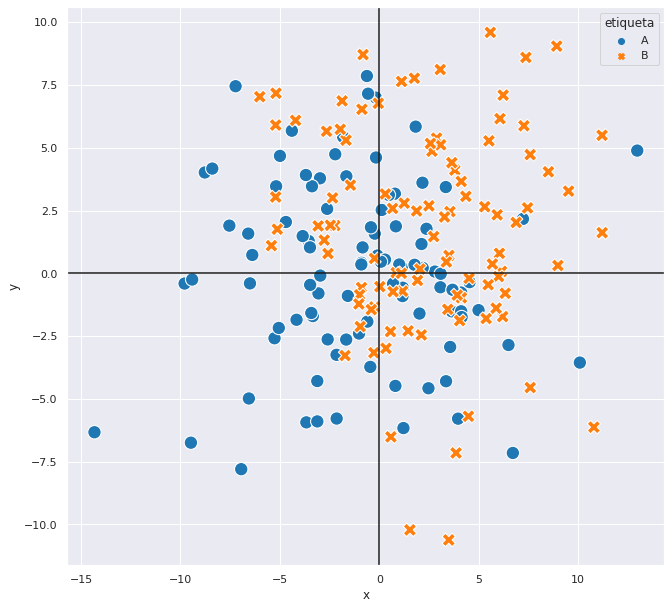

In [ ]:
sns.set(rc={'figure.figsize':(10.7,10.27)})
sns.scatterplot(x='x',y='y',hue='etiqueta',palette="tab10",data=dataset_combinados,s=180, style='etiqueta' )
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')

In [ ]:
from sklearn.model_selection import train_test_split
train_rel = 0.5
train, test = train_test_split(dataset_combinados, train_size = train_rel)

print("Set de entrenamiento:\t", len(train))
print("Set de test:\t\t", len(test))

Set de entrenamiento:	 100
Set de test:		 100


In [ ]:
X = train[['x','y']].values
X_test = test[['x','y']].values

In [ ]:
K = 10
KNN = neighbors.KNeighborsClassifier(n_neighbors=K)
KNN.fit(X, train['etiqueta'])
print(f"Modelo entrenado - Accuracy: {KNN.score(X_test, test['etiqueta'])}")

Modelo entrenado - Accuracy: 0.64


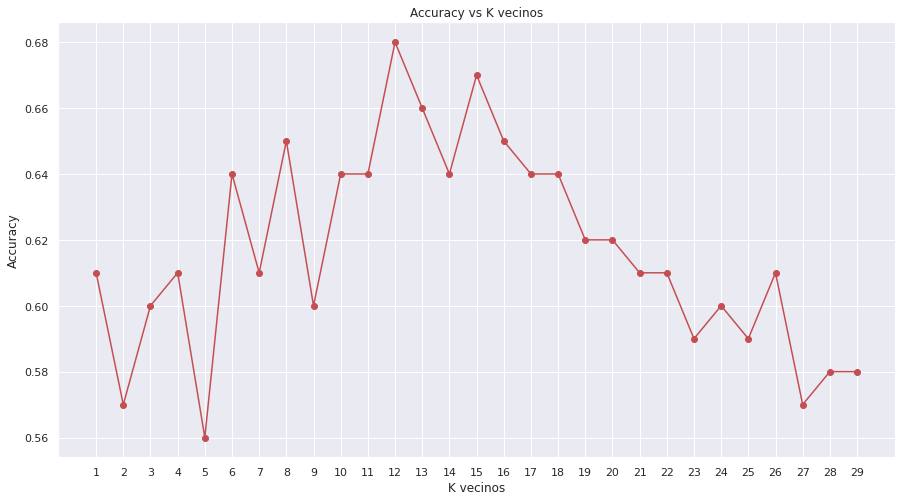

In [ ]:
scores = []
x_range = []
for k in range(1,30):
  KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X, train['etiqueta'])
  scores.append(KNN.score(X_test, test['etiqueta']))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores,'ro-')
plt.xticks(x_range)
plt.title("Accuracy vs K vecinos")
plt.xlabel("K vecinos")
plt.ylabel("Accuracy")
plt.show()

Metricas:
              precision    recall  f1-score   support

           A       0.65      0.58      0.61        57
           B       0.51      0.58      0.54        43

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.58      0.58       100



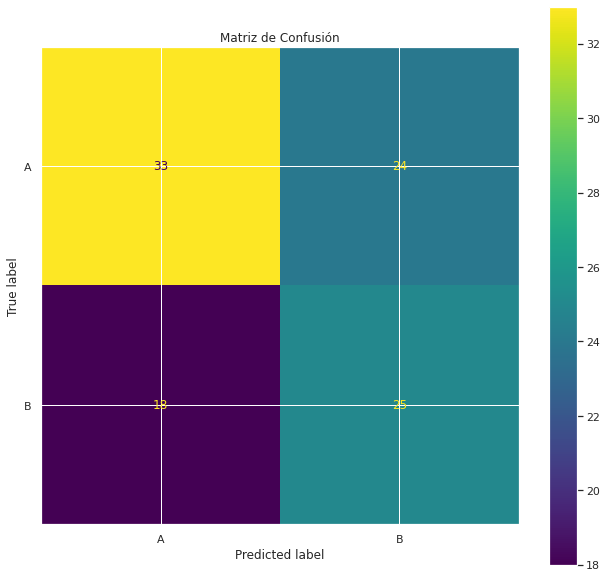

In [ ]:
y_predicted = KNN.predict(X_test)
print("Metricas:")
print(f"{metrics.classification_report(test['etiqueta'], y_predicted)}")
confusion_matrix = metrics.plot_confusion_matrix(KNN, X_test, test['etiqueta'])
plt.title("Matriz de Confusión")
plt.show()

## Conclusiones

Puede observarse que al usar datasets con medias separadas y baja varianza, el clasificador no tiene problemas en clasificar las etiquetas en casi todos los valores de K elegidos. Esto es debido a que la distancia entre los elementos de cada conjunto de datos es grande y siempre toma elementos del conjunto que le corresponde. Si juntamos las medias y ponemos una varianza alta, el clasificador no consigue buenos resultados, aún probando con diferentes valores de K, no llega a 60%.

# TP3 - Parte II - Clasificador KNN aplicado a dataset Spotify

---


### Ejercicio 3.2: 

En el notebook https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb hay un dataset con 2000+ canciones de Spotify de una usuaria, donde algunas fueron marcadas como gustadas y otras no. Cada canción tiene a su vez 16 atributos (nombre, artista, duración, bailable, etc.). Desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. Aclarar y justificar los pasos, analizar y explicar los resultados.

## Lectura y Análisis del dataset

In [ ]:
from sklearn import preprocessing

spotify_songs = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
spotify_songs[0:10]

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [ ]:
spotify_songs.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [ ]:
x = spotify_songs.drop(['song_title', 'artist', 'Unnamed: 0'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
spotify_songs = pd.DataFrame(x_scaled,columns=x.columns)

In [ ]:
print("El dataset tiene %d filas y %d columnas"%(len(spotify_songs),len(spotify_songs.columns)))

El dataset tiene 2017 filas y 14 columnas


In [ ]:
# Generamos la matriz de correlación
spotify_songs_corr = spotify_songs.corr()
spotify_songs_corr

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


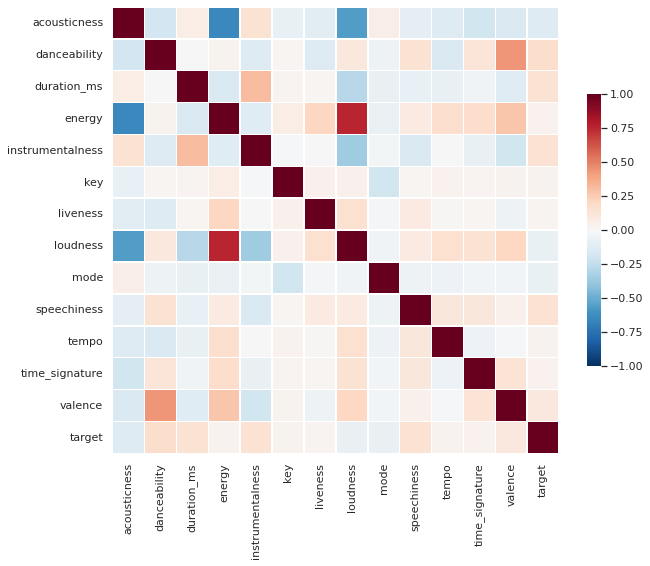

In [ ]:
# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(10, 10))

# Dibujamos el heatmap con una paleta de color divergente
sns.heatmap(spotify_songs_corr, cmap='RdBu_r', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Podemos observar que la correlación entre energía y ruidoso es alta por lo que podríamos usar una de las dos y sería representativa del fenómeno. También podemos observar que hay una correlación negativa entre canciones acústicas con ruidosa y energía. También podemos ver una correlación positiva no tan fuerte entre "valence" y "danceability".  
Es importante ver la correlación que hay entre "target" y los atributos, para elegir los más adecuados para el clasificador. En este caso serían: "danceability", "speechiness", "duration_ms" y  "instrumentalness".

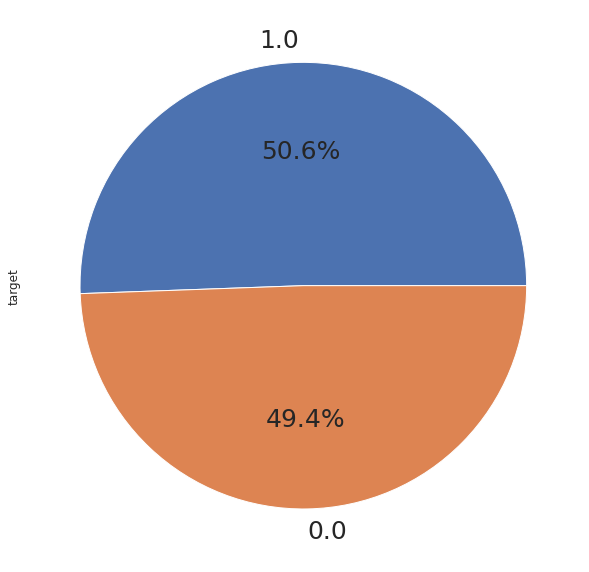

In [ ]:
spotify_songs.target.value_counts().plot(kind='pie',autopct="%.1f%%",textprops={'fontsize': 25})

## Clasificador KNN

In [ ]:
array_features = ['danceability', 'speechiness', 'instrumentalness', 'acousticness']
dataset_only_important_features = spotify_songs[array_features+['target']]

In [ ]:
dataset_only_important_features[0:10]

,danceability,speechiness,instrumentalness,acousticness,target
0,0.824826,0.514441,0.022439,0.010248,1.0
1,0.720418,0.071005,0.006260,0.199998,1.0
2,0.830626,0.335351,0.000240,0.034570,1.0
3,0.431555,0.003784,0.522541,0.607034,1.0
4,0.645012,0.058393,0.524590,0.180902,1.0
5,0.791183,0.204187,0.000000,0.004811,1.0
6,0.715777,0.167613,0.000007,0.014570,1.0
7,0.167053,0.017657,0.680328,0.020299,1.0
8,0.558005,0.408500,0.000000,0.048339,1.0
9,0.828306,0.269769,0.000000,0.002088,1.0


In [ ]:
from sklearn.model_selection import train_test_split
train_rel = 0.4
train, test = train_test_split(dataset_only_important_features, train_size = train_rel)

print("Set de entrenamiento:\t", len(train))
print("Set de test:\t\t", len(test))

Set de entrenamiento:	 806
Set de test:		 1211


In [ ]:
X = train[array_features].values
X_test = test[array_features].values

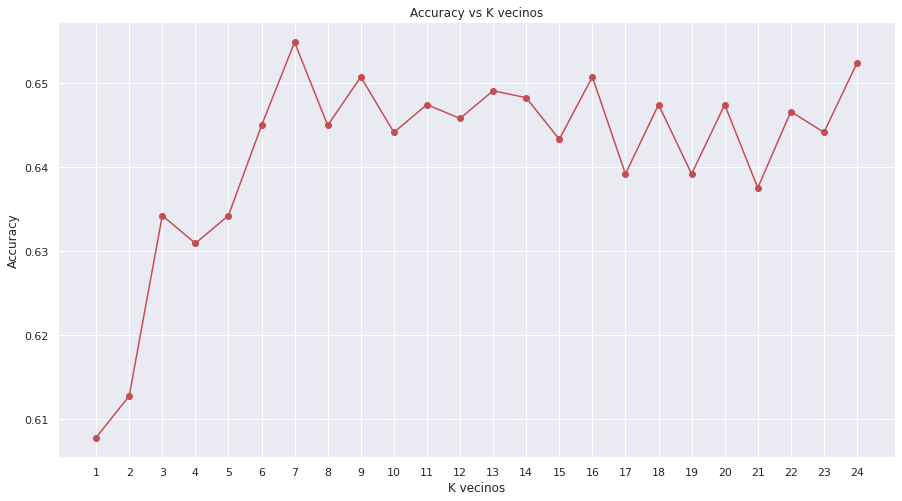

In [ ]:
scores = []
x_range = []
for k in range(1,25):
  KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X, train['target'])
  scores.append(KNN.score(X_test, test['target']))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores,'ro-')
plt.xticks(x_range)
plt.title("Accuracy vs K vecinos")
plt.xlabel("K vecinos")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print("K óptimo = %d \nAccuracy = %f"%(np.argmax(scores)+1,scores[np.argmax(scores)]))

K óptimo = 7 
Accuracy = 0.654831


Metricas:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66       603
         1.0       0.66      0.65      0.65       608

    accuracy                           0.65      1211
   macro avg       0.65      0.65      0.65      1211
weighted avg       0.65      0.65      0.65      1211



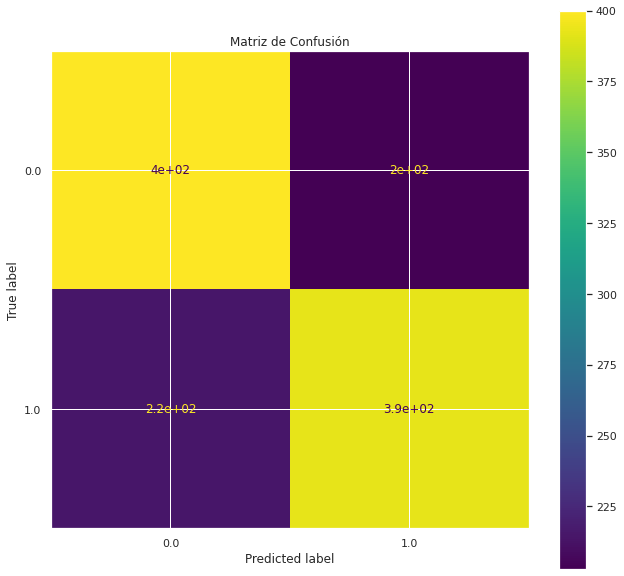

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=np.argmax(scores)+1)
KNN.fit(X, train['target'])
y_predicted = KNN.predict(X_test)
print("Metricas:")
print(f"{metrics.classification_report(test['target'], y_predicted)}")
confusion_matrix = metrics.plot_confusion_matrix(KNN, X_test, test['target'])
plt.title("Matriz de Confusión")
plt.show()

## Conclusión

Puede observarse que utilizando un K de 7 se obtiene un desempeño de 66% en el modelo. Varias técnicas pueden utilizarse para mejorar el desempeño del modelo: establecer a través de algún algoritmo el aporte de cada variable a target y usarlas (aquí solo se realizó el cálculo de correlación), convertir las variables categóricas a numéricas y considerarlas en la clasificación. Por ejemplo, un artista en particular podría ser del gusto personal de la usuaria.   
Además, se podría barrer relaciones de entrenamiento y test para determinar el valor óptimo del "split" del dataset.